In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with TEASER-S model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.teaser_s import TEASER_S

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/Publiq/')
DATA_DIR = Path('../../data/ML20M/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = TEASER_S

L2_1 = [100 ** p for p in range(1, 5)]
L2_2 = [100 ** p for p in range(1, 5)]
RHO = [10 ** p for p in range(1, 5)]  # no rho scaling 
# RHO = [500, 100000]
DELTA = 0
MAX_ITER = 1
HYPERPARAMS = {'l2_1': L2_1, 'l2_2': L2_2, 'rho': RHO, 'delta': DELTA,'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2_1': [100, 10000, 1000000, 100000000],
 'l2_2': [100, 10000, 1000000, 100000000],
 'rho': [10, 100, 1000, 10000],
 'delta': 0,
 'max_iterations': 1}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
# Precomput XTX and decomposition of XTX, since it's needed for all hyperparameters combinations and doesn't change
XTX = (X.T @ X).toarray()
p, U = np.linalg.eigh(XTX)
fit_params = {'XTX': XTX, 'p': p, 'U': U}

In [9]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, S, Xval_in, Xval_out, HYPERPARAMS, fit_params=fit_params)

Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


/home/jdepauw/TEASER/teaser/algorithm/teaser_s.py:133: RuntimeWarning: divide by zero encountered in true_divide
  beta /= (XTX_diag + self.l2_1 + 2 * self.rho)


norm E 18163.583458040845
diag norm: 387.4699855266905
diag_diff: inf


Evaluating with 10000 users
Average Recall@20 0.00419
Average Recall@100 0.02099
Average nDCG@100 0.00914
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 446.94998327650677
diag norm: 5.9066689709672255
diag_diff: 5.983656864117739


Evaluating with 10000 users
Average Recall@20 0.00985
Average Recall@100 0.04081
Average nDCG@100 0.01741
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.04423464928205278
diag norm: 0.0025887324249533284
diag_diff: 0.004792574859842587


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00737
Average nDCG@100 0.00352
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 100, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.00044326429052446496
diag norm: 2.615212062318487e-05
diag_diff: 4.6916038860880174e-05


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00809
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 10000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 22875.515616761484
diag norm: 517.1564818543444
diag_diff: inf


Evaluating with 10000 users
Average Recall@20 0.00075
Average Recall@100 0.00492
Average nDCG@100 0.00206
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 10000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 1966.2338676010288
diag norm: 163.11591039583635
diag_diff: 164.8215567642911


Evaluating with 10000 users
Average Recall@20 0.0153
Average Recall@100 0.04458
Average nDCG@100 0.02242
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 10000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.043672264959542635
diag norm: 0.0025844359653937983
diag_diff: 0.004791059415750563


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00738
Average nDCG@100 0.00353
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 10000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0004432048009439736
diag norm: 2.6151688803851563e-05
diag_diff: 4.691587838766757e-05


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00809
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 1000000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 367.8856015340555
diag norm: 90.76789782407862
diag_diff: inf


Evaluating with 10000 users
Average Recall@20 0.03325
Average Recall@100 0.0728
Average nDCG@100 0.04176
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 1000000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 119.47037298827564
diag norm: 31.964308667955123
diag_diff: 38.216069301720005


Evaluating with 10000 users
Average Recall@20 0.01732
Average Recall@100 0.06257
Average nDCG@100 0.03064
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 1000000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.030188032104148128
diag norm: 0.002372723504786463
diag_diff: 0.004721671392739879


Evaluating with 10000 users
Average Recall@20 0.00262
Average Recall@100 0.00784
Average nDCG@100 0.00368
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 1000000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0004375545409088161
diag norm: 2.6109511385054518e-05
diag_diff: 4.690027787812037e-05


Evaluating with 10000 users
Average Recall@20 0.00264
Average Recall@100 0.0081
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100000000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.16814528721664757
diag norm: 0.1139907524254988
diag_diff: inf


Evaluating with 10000 users
Average Recall@20 0.11074
Average Recall@100 0.23739
Average nDCG@100 0.13573
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100000000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.19733402098939798
diag norm: 0.08747243390378351
diag_diff: 0.4975500231401055


Evaluating with 10000 users
Average Recall@20 0.08338
Average Recall@100 0.16744
Average nDCG@100 0.09483
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100000000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.004986513294823661
diag norm: 0.0012136568263151056
diag_diff: 0.004354202694735706


Evaluating with 10000 users
Average Recall@20 0.00471
Average Recall@100 0.01398
Average nDCG@100 0.00673
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 100000000, 'rho': 10, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0003024545487847656
diag norm: 2.405451819540561e-05
diag_diff: 4.620714980103946e-05


Evaluating with 10000 users
Average Recall@20 0.00277
Average Recall@100 0.00886
Average nDCG@100 0.00401
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 18163.583458040845
diag norm: 387.4699855266905
diag_diff: 304.89717430967465


Evaluating with 10000 users
Average Recall@20 0.00419
Average Recall@100 0.02099
Average nDCG@100 0.00914
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 446.94998327650677
diag norm: 5.9066689709672255
diag_diff: 5.95272164492365


Evaluating with 10000 users
Average Recall@20 0.00985
Average Recall@100 0.04081
Average nDCG@100 0.01741
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.04423464928205278
diag norm: 0.0025887324249533284
diag_diff: 0.004791941663485513


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00737
Average nDCG@100 0.00352
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 100, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.00044326429052446496
diag norm: 2.615212062318487e-05
diag_diff: 4.691597781548732e-05


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00809
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 10000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 22875.515616761484
diag norm: 517.1564818543444
diag_diff: 3978.2072622166443


Evaluating with 10000 users
Average Recall@20 0.00075
Average Recall@100 0.00492
Average nDCG@100 0.00206
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 10000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 1966.2338676010288
diag norm: 163.11591039583635
diag_diff: 164.03091037507392


Evaluating with 10000 users
Average Recall@20 0.0153
Average Recall@100 0.04458
Average nDCG@100 0.02242
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 10000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.043672264959542635
diag norm: 0.0025844359653937983
diag_diff: 0.004790425815347005


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00738
Average nDCG@100 0.00353
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 10000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0004432048009439736
diag norm: 2.6151688803851563e-05
diag_diff: 4.691581735004744e-05


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00809
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 1000000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 367.8856015340555
diag norm: 90.76789782407862
diag_diff: 1642.7713775238044


Evaluating with 10000 users
Average Recall@20 0.03325
Average Recall@100 0.0728
Average nDCG@100 0.04176
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 1000000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 119.47037298827564
diag norm: 31.964308667955123
diag_diff: 37.92628380252206


Evaluating with 10000 users
Average Recall@20 0.01732
Average Recall@100 0.06257
Average nDCG@100 0.03064
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 1000000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.030188032104148128
diag norm: 0.002372723504786463
diag_diff: 0.0047210173122478


Evaluating with 10000 users
Average Recall@20 0.00262
Average Recall@100 0.00784
Average nDCG@100 0.00368
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 1000000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0004375545409088161
diag norm: 2.6109511385054518e-05
diag_diff: 4.690021680363601e-05


Evaluating with 10000 users
Average Recall@20 0.00264
Average Recall@100 0.0081
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100000000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.16814528721664757
diag norm: 0.1139907524254988
diag_diff: 23.507665523803567


Evaluating with 10000 users
Average Recall@20 0.11074
Average Recall@100 0.23739
Average nDCG@100 0.13573
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100000000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.19733402098939798
diag norm: 0.08747243390378351
diag_diff: 0.488977231189544


Evaluating with 10000 users
Average Recall@20 0.08338
Average Recall@100 0.16744
Average nDCG@100 0.09483
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100000000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.004986513294823661
diag norm: 0.0012136568263151056
diag_diff: 0.004353437325701605


Evaluating with 10000 users
Average Recall@20 0.00471
Average Recall@100 0.01398
Average nDCG@100 0.00673
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 100000000, 'rho': 100, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0003024545487847656
diag norm: 2.405451819540561e-05
diag_diff: 4.6207086672033117e-05


Evaluating with 10000 users
Average Recall@20 0.00277
Average Recall@100 0.00886
Average nDCG@100 0.00401
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 18163.583458040845
diag norm: 387.4699855266905
diag_diff: 292.0238902901232


Evaluating with 10000 users
Average Recall@20 0.00419
Average Recall@100 0.02099
Average nDCG@100 0.00914
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 446.94998327650677
diag norm: 5.9066689709672255
diag_diff: 5.82737145462867


Evaluating with 10000 users
Average Recall@20 0.00985
Average Recall@100 0.04081
Average nDCG@100 0.01741
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.04423464928205278
diag norm: 0.0025887324249533284
diag_diff: 0.004785606487540905


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00737
Average nDCG@100 0.00352
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 100, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.00044326429052446496
diag norm: 2.615212062318487e-05
diag_diff: 4.691536541541571e-05


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00809
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 10000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 22875.515616761484
diag norm: 517.1564818543444
diag_diff: 599.3786273023317


Evaluating with 10000 users
Average Recall@20 0.00075
Average Recall@100 0.00492
Average nDCG@100 0.00206
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 10000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 1966.2338676010288
diag norm: 163.11591039583635
diag_diff: 158.32768219561822


Evaluating with 10000 users
Average Recall@20 0.0153
Average Recall@100 0.04458
Average nDCG@100 0.02242
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 10000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.043672264959542635
diag norm: 0.0025844359653937983
diag_diff: 0.004784103489609176


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00738
Average nDCG@100 0.00353
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 10000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0004432048009439736
diag norm: 2.6151688803851563e-05
diag_diff: 4.691520698721943e-05


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00809
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 1000000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 367.8856015340555
diag norm: 90.76789782407862
diag_diff: 168.22816706322558


Evaluating with 10000 users
Average Recall@20 0.03325
Average Recall@100 0.0728
Average nDCG@100 0.04176
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 1000000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 119.47037298827564
diag norm: 31.964308667955123
diag_diff: 35.54760332880219


Evaluating with 10000 users
Average Recall@20 0.01732
Average Recall@100 0.06257
Average nDCG@100 0.03064
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 1000000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.030188032104148128
diag norm: 0.002372723504786463
diag_diff: 0.004714490488646226


Evaluating with 10000 users
Average Recall@20 0.00262
Average Recall@100 0.00784
Average nDCG@100 0.00368
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 1000000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0004375545409088161
diag norm: 2.6109511385054518e-05
diag_diff: 4.689960607217075e-05


Evaluating with 10000 users
Average Recall@20 0.00264
Average Recall@100 0.0081
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100000000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.16814528721664757
diag norm: 0.1139907524254988
diag_diff: 2.363929507316829


Evaluating with 10000 users
Average Recall@20 0.11074
Average Recall@100 0.23739
Average nDCG@100 0.13573
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100000000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.19733402098939798
diag norm: 0.08747243390378351
diag_diff: 0.4176841727489335


Evaluating with 10000 users
Average Recall@20 0.08338
Average Recall@100 0.16744
Average nDCG@100 0.09483
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100000000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.004986513294823661
diag norm: 0.0012136568263151056
diag_diff: 0.004345799170826318


Evaluating with 10000 users
Average Recall@20 0.00471
Average Recall@100 0.01398
Average nDCG@100 0.00673
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 100000000, 'rho': 1000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0003024545487847656
diag norm: 2.405451819540561e-05
diag_diff: 4.6206455395655726e-05


Evaluating with 10000 users
Average Recall@20 0.00277
Average Recall@100 0.00886
Average nDCG@100 0.00401
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 18163.583458040845
diag norm: 387.4699855266905
diag_diff: 290.6188666986909


Evaluating with 10000 users
Average Recall@20 0.00419
Average Recall@100 0.02099
Average nDCG@100 0.00914
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 446.94998327650677
diag norm: 5.9066689709672255
diag_diff: 5.547244108054544


Evaluating with 10000 users
Average Recall@20 0.00985
Average Recall@100 0.04081
Average nDCG@100 0.01741
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.04423464928205278
diag norm: 0.0025887324249533284
diag_diff: 0.004723559174763757


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00737
Average nDCG@100 0.00352
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 100, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.00044326429052446496
diag norm: 2.615212062318487e-05
diag_diff: 4.6909240321659614e-05


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00809
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 10000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 22875.515616761484
diag norm: 517.1564818543444
diag_diff: 421.01136762285637


Evaluating with 10000 users
Average Recall@20 0.00075
Average Recall@100 0.00492
Average nDCG@100 0.00206
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 10000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 1966.2338676010288
diag norm: 163.11591039583635
diag_diff: 141.15737005250043


Evaluating with 10000 users
Average Recall@20 0.0153
Average Recall@100 0.04458
Average nDCG@100 0.02242
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 10000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.043672264959542635
diag norm: 0.0025844359653937983
diag_diff: 0.0047222088348810335


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00738
Average nDCG@100 0.00353
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 10000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0004432048009439736
diag norm: 2.6151688803851563e-05
diag_diff: 4.690910387961637e-05


Evaluating with 10000 users
Average Recall@20 0.00263
Average Recall@100 0.00809
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 1000000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 367.8856015340555
diag norm: 90.76789782407862
diag_diff: 77.65901380250942


Evaluating with 10000 users
Average Recall@20 0.03325
Average Recall@100 0.0728
Average nDCG@100 0.04176
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 1000000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 119.47037298827564
diag norm: 31.964308667955123
diag_diff: 28.920993624826203


Evaluating with 10000 users
Average Recall@20 0.01732
Average Recall@100 0.06257
Average nDCG@100 0.03064
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 1000000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.030188032104148128
diag norm: 0.002372723504786463
diag_diff: 0.004650596700973001


Evaluating with 10000 users
Average Recall@20 0.00262
Average Recall@100 0.00784
Average nDCG@100 0.00368
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 1000000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0004375545409088161
diag norm: 2.6109511385054518e-05
diag_diff: 4.689350009506805e-05


Evaluating with 10000 users
Average Recall@20 0.00264
Average Recall@100 0.0081
Average nDCG@100 0.00375
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100000000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.16814528721664757
diag norm: 0.1139907524254988
diag_diff: 0.2603077458056583


Evaluating with 10000 users
Average Recall@20 0.11074
Average Recall@100 0.23739
Average nDCG@100 0.13573
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100000000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.19733402098939798
diag norm: 0.08747243390378351
diag_diff: 0.18310886417654493


Evaluating with 10000 users
Average Recall@20 0.08338
Average Recall@100 0.16744
Average nDCG@100 0.09483
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100000000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.004986513294823661
diag norm: 0.0012136568263151056
diag_diff: 0.004270937389863157


Evaluating with 10000 users
Average Recall@20 0.00471
Average Recall@100 0.01398
Average nDCG@100 0.00673
Training model TEASER_S with hyperparameters {'l2_1': 100000000, 'l2_2': 100000000, 'rho': 10000, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0003024545487847656
diag norm: 2.405451819540561e-05
diag_diff: 4.620014400020655e-05


Evaluating with 10000 users
Average Recall@20 0.00277
Average Recall@100 0.00886
Average nDCG@100 0.00401



In [10]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.13573249339837348 achieved with {'l2_1': 100, 'l2_2': 100000000, 'rho': 10, 'delta': 0, 'max_iterations': 1}."

## Evaluate model with optimal hyperparams on test set

In [11]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X, S, **fit_params)

Decompose DTD


norm E 0.16814528721664757
diag norm: 0.1139907524254988
diag_diff: inf


CPU times: user 19min 5s, sys: 2min 52s, total: 21min 58s
Wall time: 49.5 s


In [12]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 10000 users
Average Recall@20 0.11037
Average Recall@100 0.23313
Average nDCG@100 0.13621


## Plot amount of items from long tail recommended

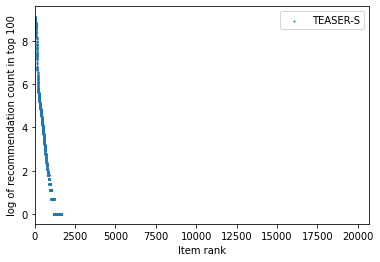

In [13]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)